# Data Analysis Project
### Spring 2025
## Analyzing Insurance Auto Claims

<br>
<br>
<p align="center">
<img 
  src="./files/car_accident.png" 
  alt="Car Accident" 
  width="600"
  height="450"
/>
</p>

<br>

## Introduction
This semester we will be working with a dataset of auto claims filed by customers of an automobile insurance company located in the southwest and western regions of the United States.

Insurance companies depend on accurate pricing estimates to maintain profitability. Auto policies must be priced so that the insurance company makes a profit in the long run, given the costs of their customers' payouts for accident repairs, total loss car replacements, medical fees, and legal fees.

The executives at this insurance company have noticed declining profitability over the last several years and have hired you as a data science consultant to evaluate their claims data and make recommendations on pricing, customer behavior, and car insurance policy adjustments.

The objective of this project is to perform an exploratory data analysis on the `claims_df` dataset and produce an executive summary of your key insights and recommendations to the executive team at the insurance company.

Before you begin, take a moment to read through the following insurance company terms to familiarize yourself with the industry: [Auto Insurance Terms](https://www.iii.org/article/auto-insurance-jargon-buster "Auto Insurance Terms")

## Auto Claims Data

The `claims_df` data frame is loaded below and consists of 6,249 auto claims submitted by customers of the insurance company. The rows in this data frame represent a single claim with all of the associated features that are displayed in the table below.

### Data Definitions

| Variable                	| Definition                                                  	| Data Type 	|
|:------------------------- |:------------------------------------------------------------- |:------------- |
| customer_id             	| Customer identifier                                         	| Character 	|
| customer_state          	| State of residence                                          	| Factor    	|
| highest_education       	| Highest level of education                                  	| Factor    	|
| employment_status       	| Employment status at time of claim                          	| Factor    	|
| gender                  	| Gender                                                      	| Factor    	|
| income                  	| Income (US Dollars)                                         	| Numeric   	|
| residence_type          	| Customer residence type                                     	| Factor    	|
| marital_status          	| Marital status                                              	| Factor    	|
| sales_channel           	| Customer acquisition method                                 	| Factor    	|
| coverage                	| Auto policy tier                                            	| Factor    	|
| policy                  	| Auto policy type                                            	| Factor    	|
| vehicle_class           	| Vehicle type                                                	| Factor    	|
| vehicle_size            	| Vehicle size                                                	| Factor    	|
| monthly_premium         	| Customer monthly premium                                    	| Numeric   	|
| months_policy_active    	| Number of months policy has been active                     	| Numeric   	|
| months_since_last_claim 	| Number of months since last claim                           	| Numeric   	|
| current_claim_amount    	| Current claim amount                                        	| Numeric   	|
| total_claims            	| Total number of claims in customer history                  	| Numeric   	|
| total_claims_amount     	| Total amount of all claims in customer history              	| Numeric   	|
| customer_lifetime_value 	| Customer lifetime value (total revenue - total claims cost) 	| Numeric   	|

In [1]:
# Load data
library(tidyverse)

claims_df <- 
  readRDS(url('https://gmubusinessanalytics.netlify.app/data/claims_df.rds'))

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.4     ✔ readr     2.1.5
✔ forcats   1.0.0     ✔ stringr   1.5.1
✔ ggplot2   3.5.1     ✔ tibble    3.2.1
✔ lubridate 1.9.3     ✔ tidyr     1.3.1
✔ purrr     1.0.2     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors


In [2]:
# View data
claims_df

customer_id,customer_state,highest_education,employment_status,gender,income,residence_type,marital_status,sales_channel,coverage,policy,vehicle_class,vehicle_size,monthly_premium,months_policy_active,months_since_last_claim,current_claim_amount,total_claims,total_claims_amount,customer_lifetime_value
<chr>,<fct>,<fct>,<fct>,<fct>,<dbl>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
AA11235,Nevada,Bachelor,Medical Leave,Female,11167,Suburban,Married,Branch,Basic,Personal,Two-Door Car,Midsize,73,25,0,1383,1,1383,442
AA16582,Washington,Bachelor,Medical Leave,Male,14072,Suburban,Divorced,Agent,Basic,Personal,Four-Door Car,Midsize,71,27,13,1379,2,1992,-75
AA34092,California,Associate,Employed,Male,33635,Suburban,Married,Web,Extended,Personal,Luxury SUV,Midsize,240,32,1,2633,2,3671,4009
AA56476,Arizona,High School,Employed,Female,74454,Suburban,Single,Call Center,Basic,Corporate,Four-Door Car,Midsize,71,39,25,906,2,1541,1228
AA69265,Nevada,Bachelor,Employed,Female,60817,Suburban,Single,Web,Premium,Personal,Four-Door Car,Midsize,103,21,3,1095,2,1760,403
AA71604,Arizona,Master,Employed,Female,87560,Suburban,Married,Web,Extended,Personal,Two-Door Car,Midsize,98,17,4,1136,2,1828,-162
AA93585,California,Associate,Employed,Male,97024,Urban,Married,Branch,Premium,Personal,SUV,Midsize,177,33,0,1712,1,1712,4129
AB21519,California,Associate,Employed,Female,93272,Urban,Married,Branch,Extended,Personal,Four-Door Car,Midsize,95,26,3,1702,2,2585,-115
AB23825,California,Associate,Employed,Male,21509,Suburban,Single,Agent,Extended,Personal,Two-Door Car,Midsize,81,48,24,2058,2,3033,855


## Exploratory Data Analysis (80 Points)

Executives at this company have hired you as a data science consultant to evaluate their claims data and make recommendations on pricing, customer behavior, and car insurance policy adjustments.

You must think of **at least 8 relevant questions** that will provide evidence for your recommendations.

The goal of your analysis should be discovering which variables drive the differences between customers with large lifetime values and customers who cost the company more than they provide in revenue through monthly premiums.

Some of the many questions you can explore include:

- Are there types of customers, based on their policy or demographics, that are highly profitable?
- Do certain policies have a lower number of claims, leading to large profits?
- Are there "problem customers" which have a large number of claims?

You must answer each question and provide supporting data summaries with either a summary data frame (using `dplyr`/`tidyr`) or a plot (using `ggplot`) or both.

In total, you must have a minimum of 5 plots and 4 summary data frames for the exploratory data analysis section. Among the plots you produce, you must have at least 4 different types (ex. box plot, bar chart,
histogram, heat map, etc...)

Each question must be answered with **supporting evidence** from your tables and plots.

See the example question below.

### Sample Question
The sample below is from a previous semester where students analyzed a dataset, **employee_df**, with information on employees of a company and whether they decided to leave the company for another job.

The question, `R` code, and answer are examples of the correct style and language that you should use for your work.

### Question

**Is there a relationship between employees leaving the company and their current salary?**

**Answer**: Yes, the data indicates that employees who leave the company tend to have lower salaries when compared to employees who do not. Among the 237 employees that left the company, the average salary was \$76,625. This is over \$20,000 less than the average salary of employees who did not leave the company.

Among the employees *who did not leave the company*, only 10% have a salary that is less than or equal to \$60,000. When looking at employees who did leave the company, this increases to 34%.

### Supporting Table and Visualization

Note - the sample code and output below is an image, not code cells

<p align="center">
<img 
  src="https://gmubusinessanalytics.netlify.app/images/sample_table.jpg"
  width="650"
  height="auto"
/>
</p>

<br>
<br>
<br>

<p align="center">
<img 
  src="https://gmubusinessanalytics.netlify.app/images/sample_plot.jpg"
  width="650"
  height="auto"
/>
</p>


## Question 1

**Question**: How does a customer’s education level influence their Customer Lifetime Value (CLV), and what key trends emerge from the data?


**Answer**: The analysis shows that education level impacts CLV, with Master’s degree holders having the highest CLV (1154) and Doctoral holders the lowest (778). This challenges the assumption that higher education leads to higher CLV, suggesting other factors like income, financial behavior, or policy preferences play a role. The boxplot visualization highlights wide CLV variation within each education level, with outliers exceeding 15,000 CLV. Median CLV values decline from Master’s to Doctoral levels, indicating potential shifts in financial engagement or risk behavior. Surprisingly, High School graduates rank second in CLV, proving that formal education alone doesn’t determine profitability. Insurers should consider employment, income, and claim frequency for better segmentation. A data driven approach could involve targeting high CLV groups with premium offerings and retention incentives to maximize profitability.

## Supporting Analysis

# A tibble: 5 × 4
  highest_education avg_clv median_clv count
  <fct>               <dbl>      <dbl> <int>
1 Master              1154.       802    578
2 High School          966.       592.  1708
3 Associate            883.       595   1843
4 Bachelor             868.       524.  1868
5 Doctoral             778.       411    252


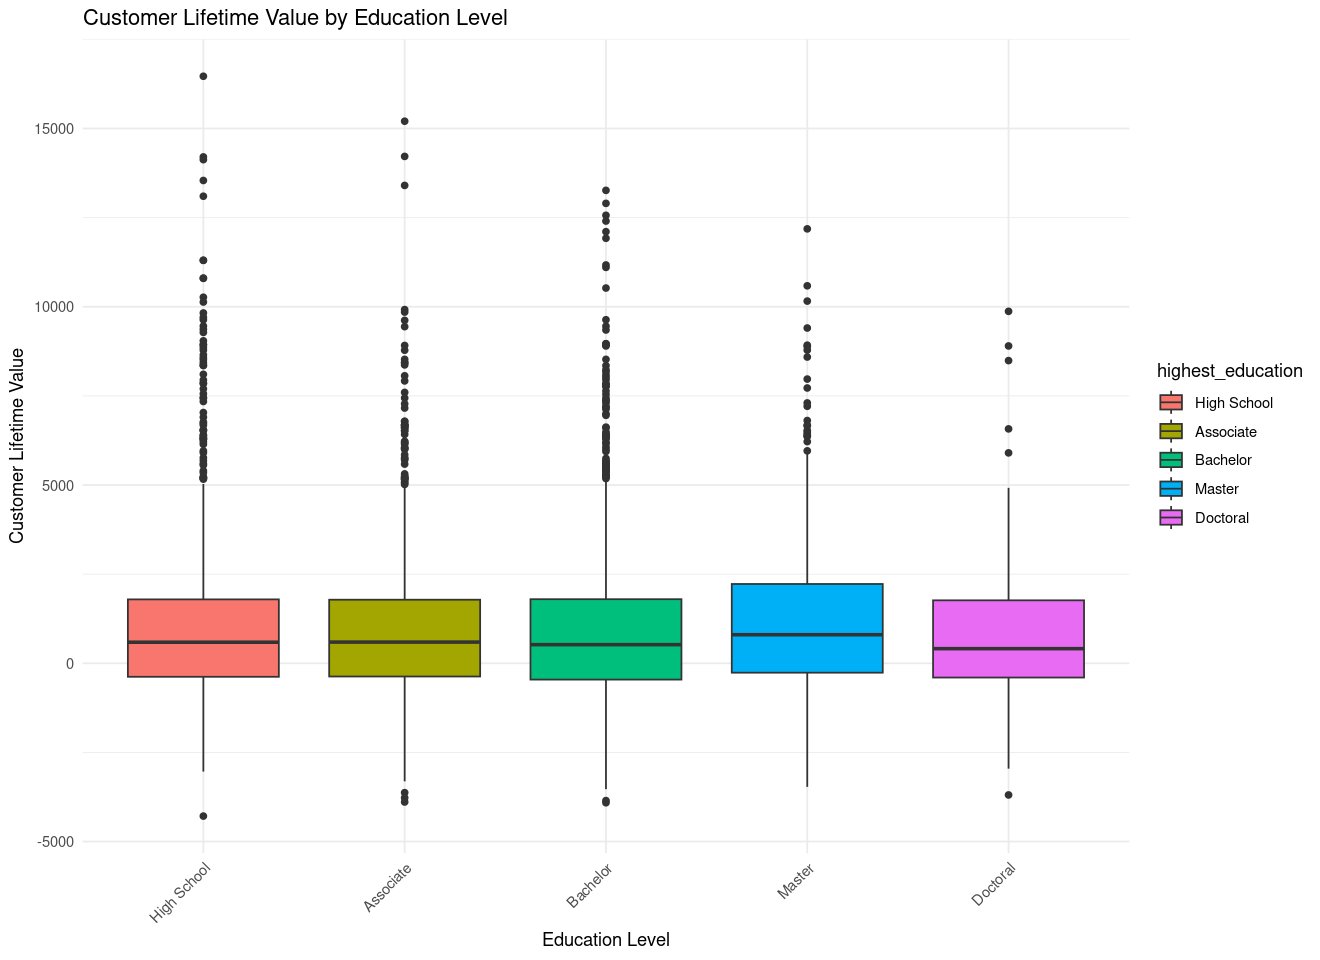

In [3]:
# This code adjusts the figure output size in the notebook
options(repr.plot.width=11, repr.plot.height=8)

# load the required library functions
library(dplyr)

# Summary data frame

# Summary table: Average customer lifetime value (CLV) by education level
education_summary <- claims_df %>%
  group_by(highest_education) %>%
  summarise(avg_clv = mean(customer_lifetime_value),
            median_clv = median(customer_lifetime_value),
            count = n()) %>%
  arrange(desc(avg_clv))

# Print the summary table
print(education_summary)

# load the required library functions
library(ggplot2)

# Visualization - Boxplot

# Boxplot for Customer Lifetime Value (CLV) by Education Level
ggplot(claims_df, aes(x = highest_education, y = customer_lifetime_value, fill = highest_education)) +
  geom_boxplot() +  
  theme_minimal() +
  labs(title = "Customer Lifetime Value by Education Level", 
       x = "Education Level", 
       y = "Customer Lifetime Value") +
  theme(axis.text.x = element_text(angle = 45, hjust = 1))

## Question 2


**Question**: Which policy types generate the highest Customer Lifetime Value (CLV) and contribute most to the profitability of the company?



**Answer**: The analysis shows that Corporate policies have the highest CLV (951), followed by Personal policies (924), while Special policies have the lowest CLV (746). The bar chart visualization confirms this trend, highlighting Corporate policies as the most profitable. Despite slightly lower CLV, Personal policies have the largest customer base (4,658), making them a key revenue driver. Special policies contribute the least, indicating a need for restructuring or pricing adjustments. To maximize profitability, insurers should focus on Corporate policies while improving retention in Personal policies.


## Supporting Analysis


# A tibble: 3 × 3
  policy    avg_clv total_customers
  <fct>       <dbl>           <int>
1 Corporate    951.            1328
2 Personal     924.            4658
3 Special      746.             263


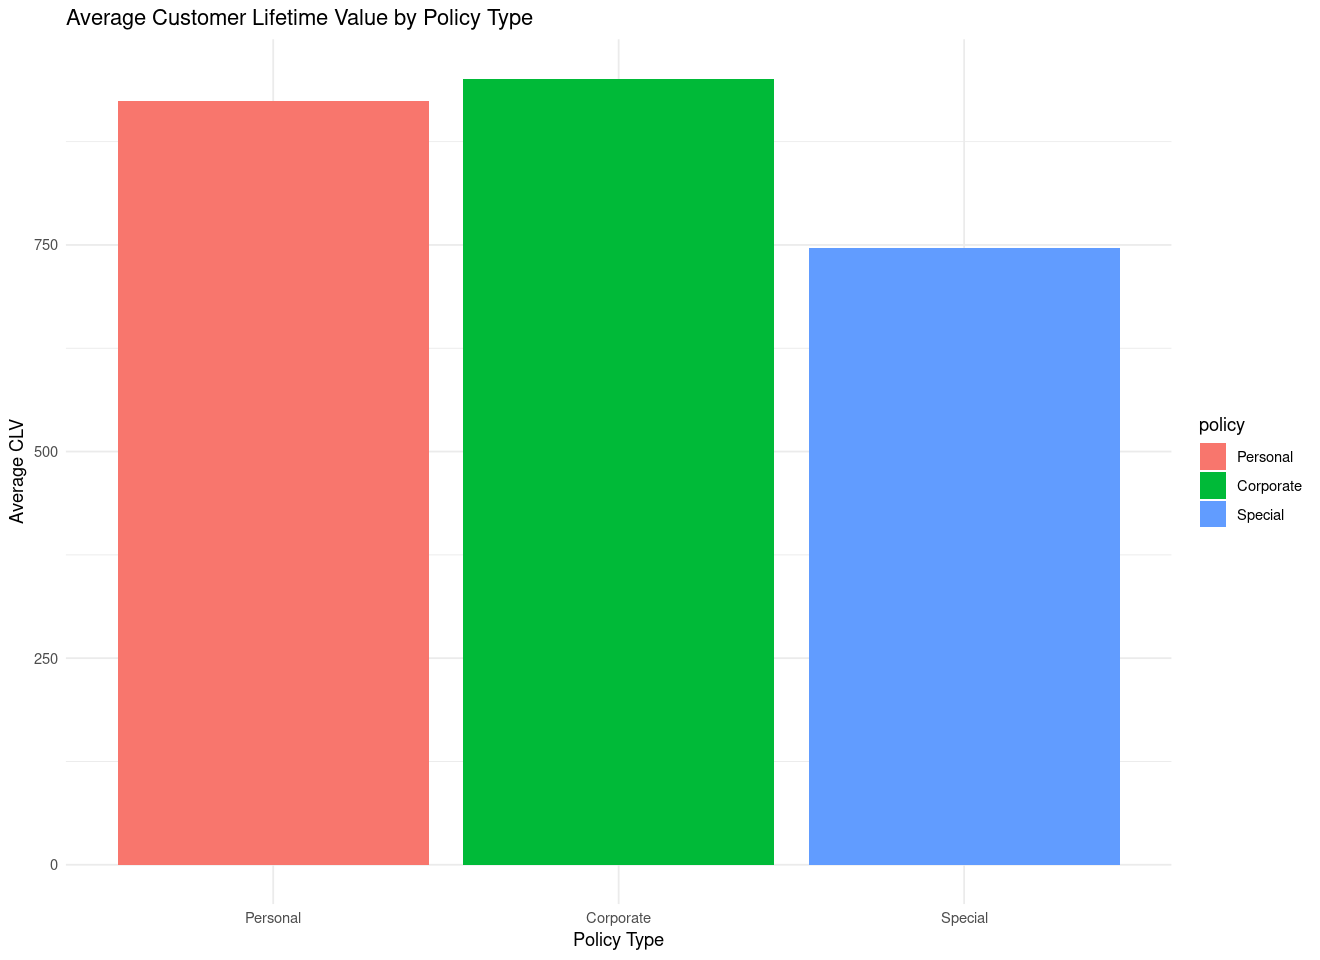

In [4]:
# Summary data frame

# Summary table: Average customer lifetime value (CLV) by policy type
policy_summary <- claims_df %>%
  group_by(policy) %>%
  summarise(avg_clv = mean(customer_lifetime_value),
            total_customers = n()) %>%
  arrange(desc(avg_clv))

# Print the summary table
print(policy_summary)

# Visualization - Bar Chart

# Bar chart for customer lifetime value (CLV) by Policy Type
ggplot(policy_summary, aes(x = policy, y = avg_clv, fill = policy)) +
  geom_bar(stat = "identity") +  
  theme_minimal() +
  labs(title = "Average Customer Lifetime Value by Policy Type", 
       x = "Policy Type", 
       y = "Average CLV")

## Question 3


**Question**: How do different vehicle classes and sizes impact total claim amounts, and which categories contribute the highest claim costs?



**Answer**: The analysis reveals that Luxury Cars (Large) have the highest average claim amount (3058), followed by Two-Door Midsize Cars (2775) and Small SUVs (2774). The heatmap visualization highlights higher claim concentrations in larger vehicle sizes, especially in Luxury and SUV categories. Smaller vehicles generally have lower claim amounts, indicating lower risk. The summary table confirms that Sports Cars and Four Door Cars also exhibit relatively high claim values. Insurers should adjust pricing models and risk assessments accordingly, prioritizing higher premiums for high risk categories while offering incentives for lower risk vehicles. 


## Supporting Analysis


`summarise()` has grouped output by 'vehicle_class'. You can override using the
`.groups` argument.


# A tibble: 18 × 3
# Groups:   vehicle_class [6]
   vehicle_class vehicle_size avg_claims
   <fct>         <fct>             <dbl>
 1 Luxury Car    Large             3058.
 2 Two-Door Car  Midsize           2775.
 3 SUV           Small             2774.
 4 Four-Door Car Midsize           2773.
 5 Luxury SUV    Large             2771.
 6 Sports Car    Midsize           2750.
 7 Four-Door Car Large             2743.
 8 SUV           Midsize           2743.
 9 Two-Door Car  Small             2740.
10 Luxury Car    Small             2705.
11 Four-Door Car Small             2699.
12 Two-Door Car  Large             2676.
13 Sports Car    Small             2648.
14 SUV           Large             2645.
15 Luxury Car    Midsize           2624.
16 Luxury SUV    Small             2611.
17 Luxury SUV    Midsize           2556.
18 Sports Car    Large             2460.



Attaching package: ‘reshape2’


The following object is masked from ‘package:tidyr’:

    smiths




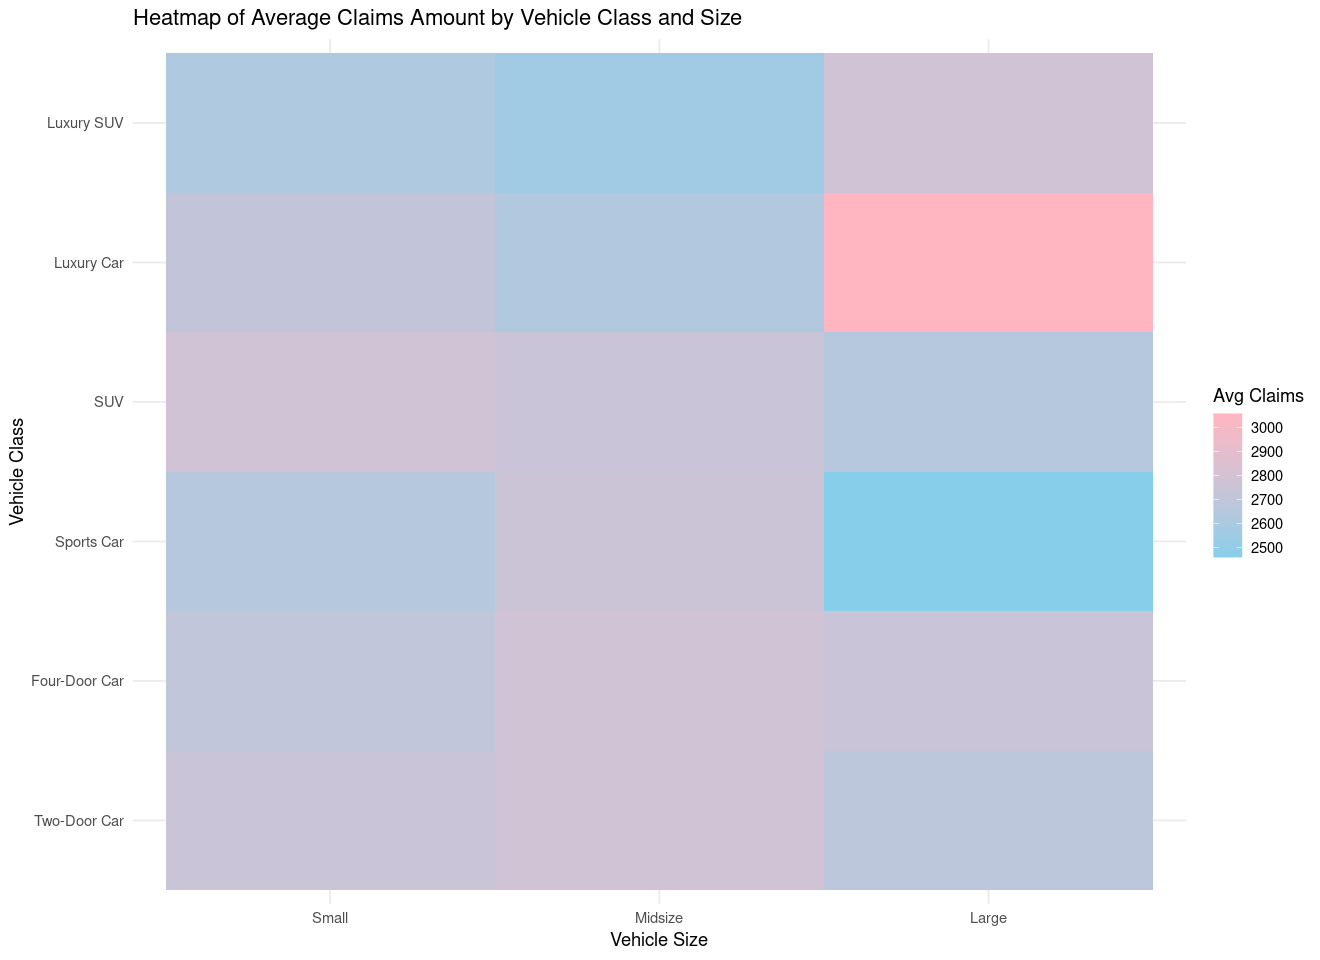

In [5]:
# load the required library functions
library(dplyr)

# Summary data frame

# Summary table: Average total claims amount by vehicle class and size
vehicle_summary <- claims_df %>%
  group_by(vehicle_class, vehicle_size) %>%
  summarise(avg_claims = mean(total_claims_amount, na.rm = TRUE)) %>%
  arrange(desc(avg_claims))

# Print the summary table
print(vehicle_summary)

# Load the required library functions
library(ggplot2)
library(reshape2)

vehicle_summary_melted <- melt(vehicle_summary, id.vars = c("vehicle_class", "vehicle_size"))

# Visualization - Heatmap

ggplot(vehicle_summary_melted, aes(x = vehicle_size, y = vehicle_class, fill = value)) +
  geom_tile() +
  scale_fill_gradient(low = "skyblue", high = "lightpink") +
  theme_minimal() +
  labs(title = "Heatmap of Average Claims Amount by Vehicle Class and Size", 
       x = "Vehicle Size", 
       y = "Vehicle Class", 
       fill = "Avg Claims")

## Question 4


**Question**: Which customers are more likely to file frequent claims, and what patterns emerge from the data regarding their claim behavior?



**Answer**: The analysis reveals that a subset of customers file significantly more claims, with the top 10 customers each filing 4 claims. The histogram visualization shows that most customers file only a few claims, while a smaller group exhibits frequent claim activity, potentially indicating high-risk or fraudulent behavior. The summary table highlights negative Customer Lifetime Values (CLV) for many frequent claimants, suggesting that these customers cost the company more than they contribute in revenue. Insurers should focus on identifying high risk customers early and implementing risk-adjusted pricing or claim monitoring strategies.

## Supporting Analysis


# A tibble: 10 × 4
   customer_id total_claims total_claims_amount customer_lifetime_value
   <chr>              <dbl>               <dbl>                   <dbl>
 1 AG62140                4                3296                    -372
 2 AH53588                4                5606                   -3890
 3 AI58313                4                2851                    2021
 4 AJ32539                4                4313                   -2297
 5 AL46984                4                4802                   -2904
 6 AM36670                4                3571                   -1587
 7 AN57220                4                4564                   -2185
 8 AO77635                4                3881                      97
 9 AQ91207                4                4394                   -3008
10 AR40217                4                3411                   -2241


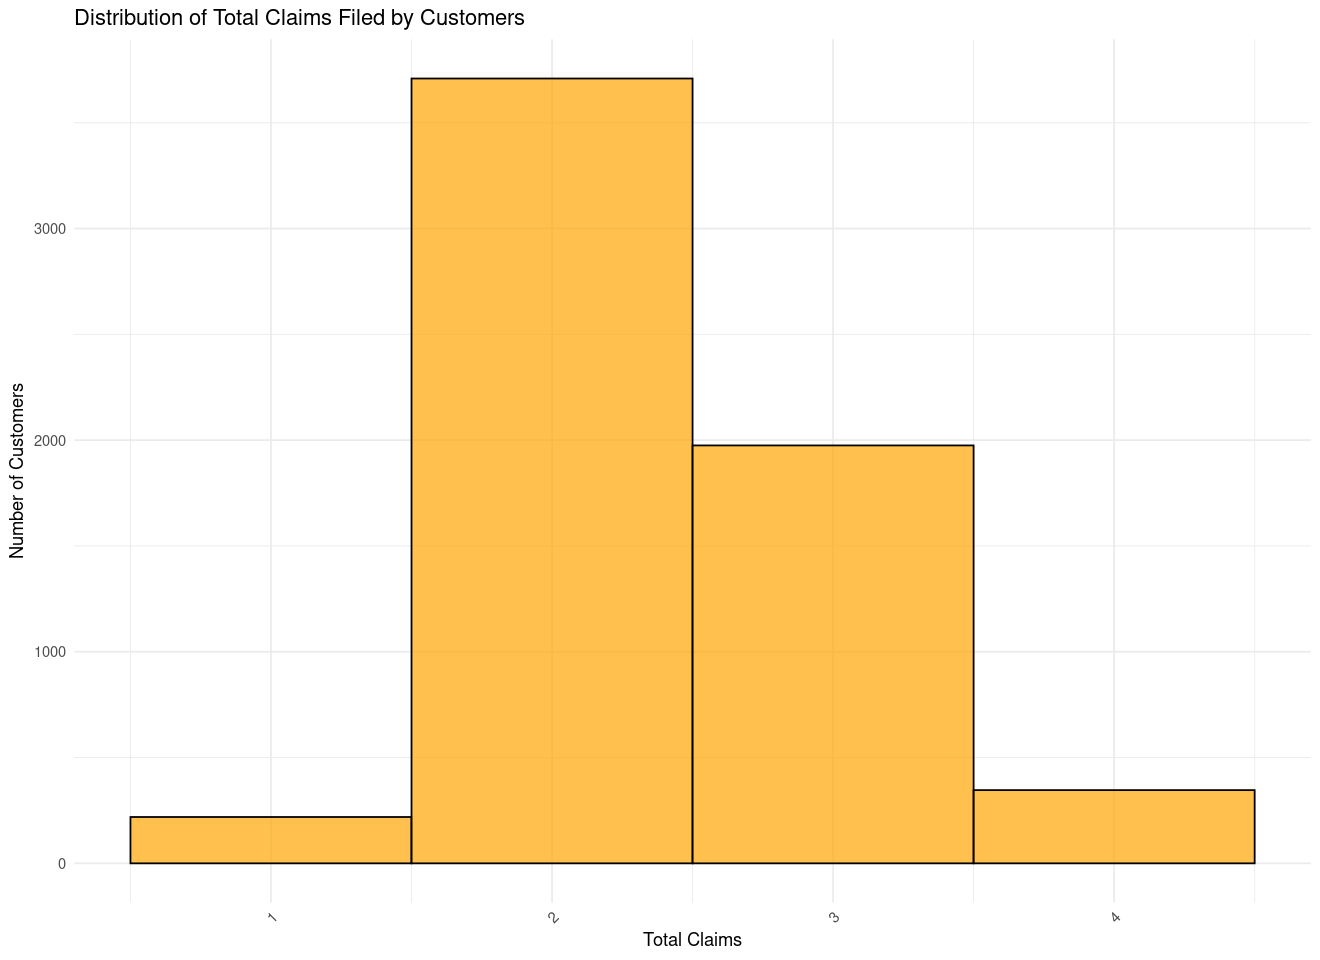

In [6]:
# Summary data frame

# Identify top 10 customers with highest claims
top_claim_customers <- claims_df %>%
  select(customer_id, total_claims, total_claims_amount, customer_lifetime_value) %>%
  arrange(desc(total_claims)) %>%
  head(10)

# Print the summary table
print(top_claim_customers)

# load the required library functions
library(ggplot2)
library(dplyr)

# Visualization - Histogram

# Histogram of total claims
ggplot(claims_df, aes(x = total_claims)) +
  geom_histogram(binwidth = 1, fill = "orange", color = "black", alpha = 0.7) +
  theme_minimal() +
  labs(title = "Distribution of Total Claims Filed by Customers",
       x = "Total Claims",
       y = "Number of Customers") +
  theme(axis.text.x = element_text(angle = 45, hjust = 1))

## Question 5


**Question**: How does monthly premium impact Customer Lifetime Value (CLV), and what patterns emerge from the data visualization?


**Answer**: The scatter plot visualization indicates a positive correlation between monthly premium and CLV, suggesting that higher premiums are linked to higher CLV. Customers paying lower premiums tend to have lower CLV, while those with higher premiums exhibit greater variation in CLV, with some reaching above 15,000 CLV. A denser cluster of points at lower premiums suggests that most customers fall within this range, but high CLV customers are more dispersed at higher premium levels. Despite this trend, some outliers exist where high premiums do not guarantee high CLV, indicating potential differences in customer retention or claims behavior. Insurers should focus on optimizing premium pricing to balance profitability and customer retention strategies. 


## Supporting Analysis


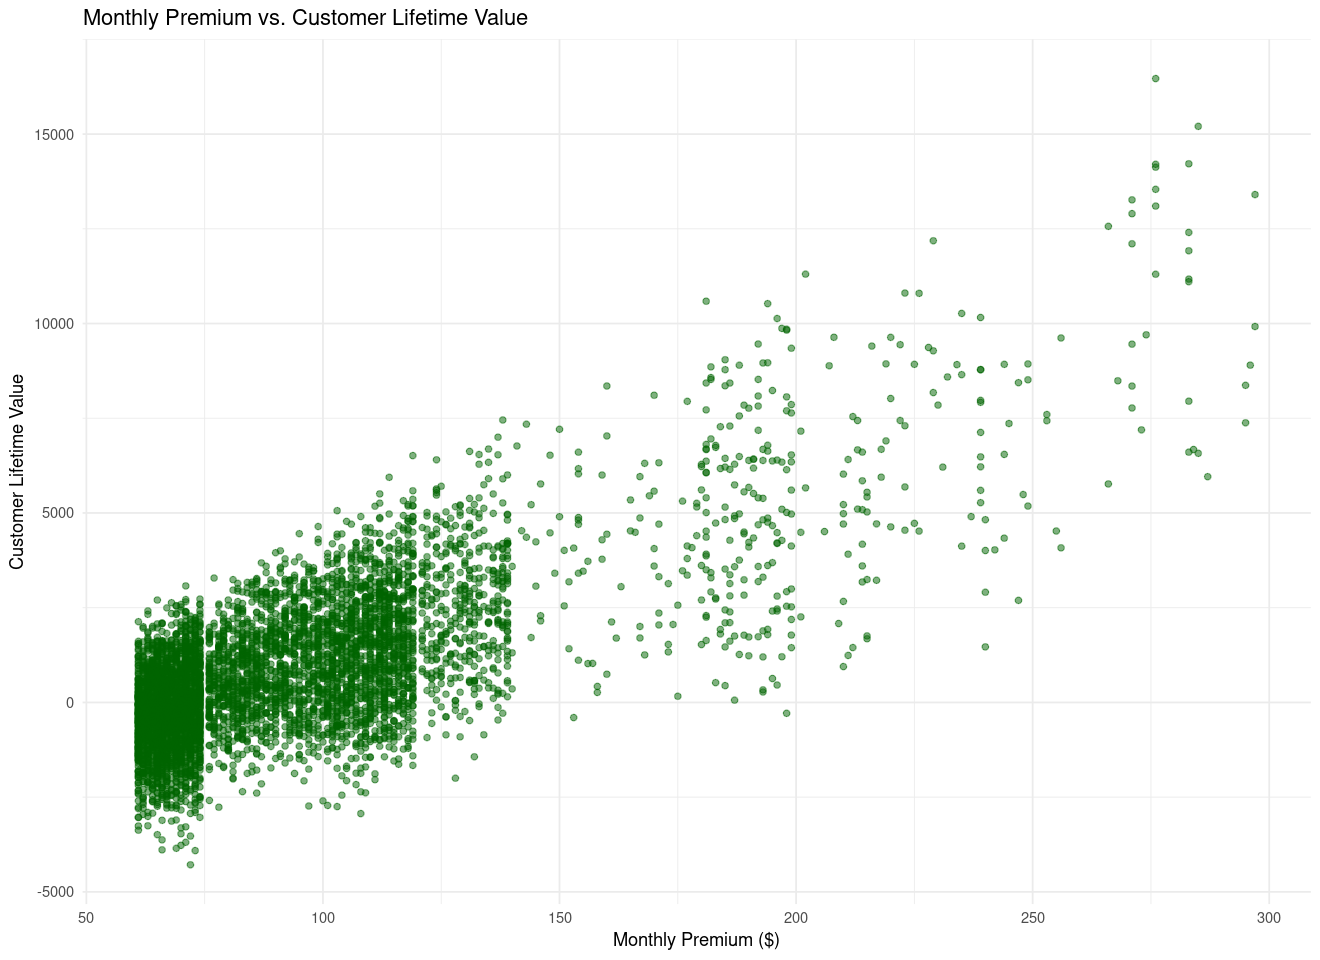

In [7]:
# Visualization - Scatter Plot

# Scatter Plot for Monthly Premium vs Customer lifetime value (CLV)
ggplot(claims_df, aes(x = monthly_premium, y = customer_lifetime_value)) +
  geom_point(alpha = 0.5, color = "darkgreen") +  
  theme_minimal() +
  labs(title = "Monthly Premium vs. Customer Lifetime Value", 
       x = "Monthly Premium ($)", 
       y = "Customer Lifetime Value")

## Question 6


**Question**: Do long-tenured customers file more or fewer claims, and what patterns emerge from the claim frequency data?



**Answer**: The heatmap visualization reveals that claim frequency is highest in the early months of policy tenure, with gradual decline over time. Yellow regions on the left indicate high claim intensity, suggesting that newer customers file more claims. As policy tenure increases, claims stabilize and decrease, implying that longer tenured customers are generally lower risk. The trend suggests that newer policyholders might be testing coverage limits or have riskier profiles. Insurers should monitor high claim early stage customers closely while offering loyalty incentives to long-tenured, lower risk customers.


## Supporting Analysis


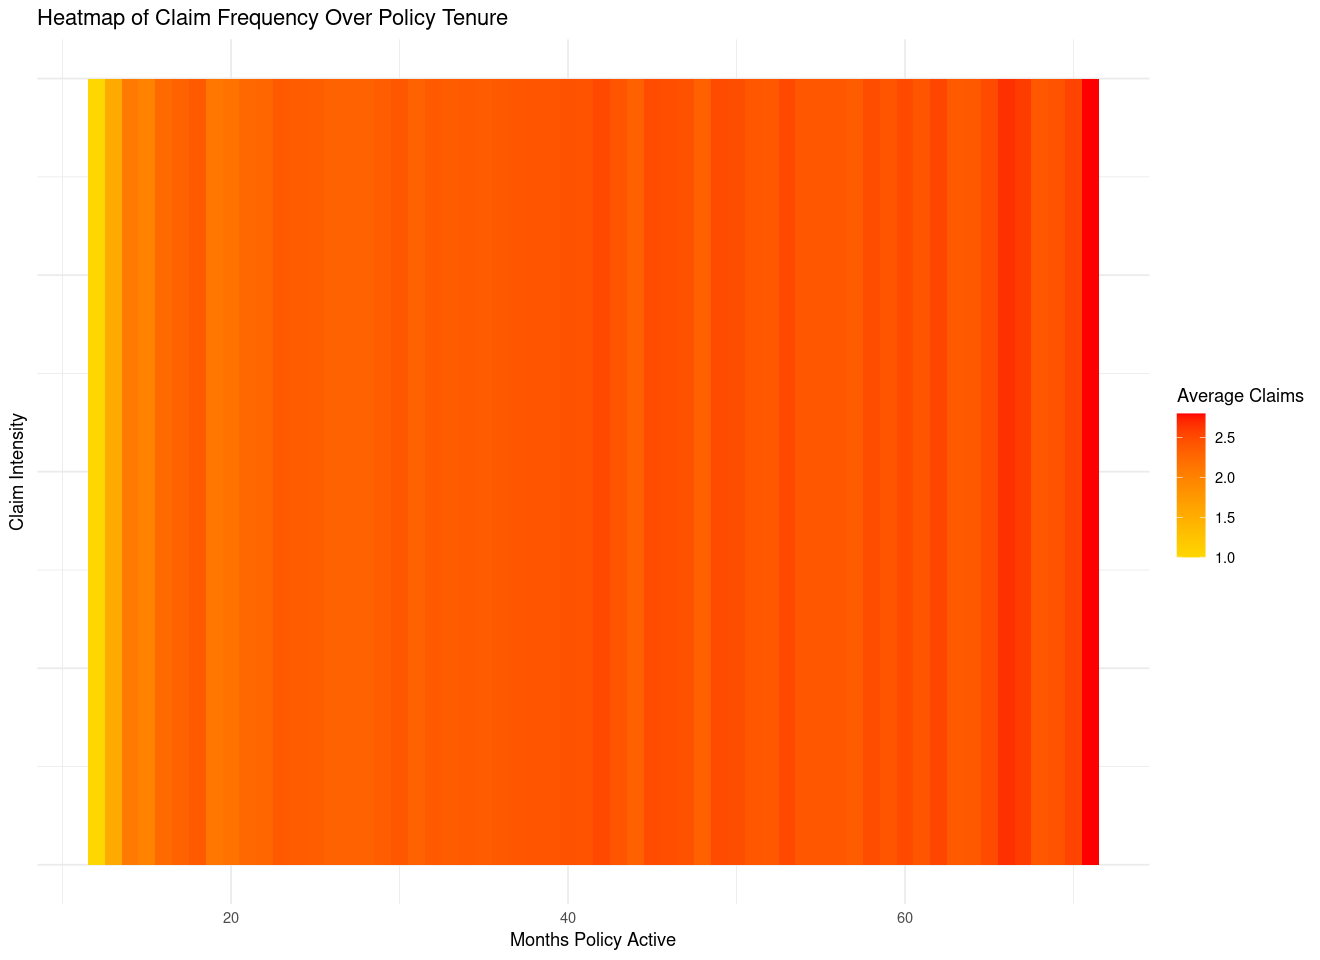

In [8]:
# load the required library functions
library(ggplot2)
library(dplyr)

# aggregate data for the heatmap
tenure_claims_summary <- claims_df %>%
  group_by(months_policy_active) %>%
  summarise(avg_claims = mean(total_claims))

# Visualization - Heatmap

ggplot(tenure_claims_summary, aes(x = months_policy_active, y = 1, fill = avg_claims)) +
  geom_tile() +
  scale_fill_gradient(low = "gold", high = "red") +
  theme_minimal() +
  labs(title = "Heatmap of Claim Frequency Over Policy Tenure",
       x = "Months Policy Active",
       y = "Claim Intensity",
       fill = "Average Claims") +
  theme(axis.text.y = element_blank(), axis.ticks.y = element_blank())

## Question 7


**Question**: What is the relationship between sales channels and claim frequency, and which channels contribute to higher claim activity?



**Answer**: The boxplot visualization shows that claim frequency remains fairly consistent across different sales channels, with no significant outliers. The median number of claims is similar for all channels, indicating that no single channel dominates in terms of claim volume. However, variations in claim distributions suggest potential behavioral differences among policyholders based on the sales channel used. While branches, agents, and web sales show similar claim trends, call centers exhibit slightly higher claim variability, possibly due to different risk profiles or customer segments. Insurers should consider further segmentation to assess risk factors associated with each channel and optimize underwriting strategies.


## Supporting Analysis


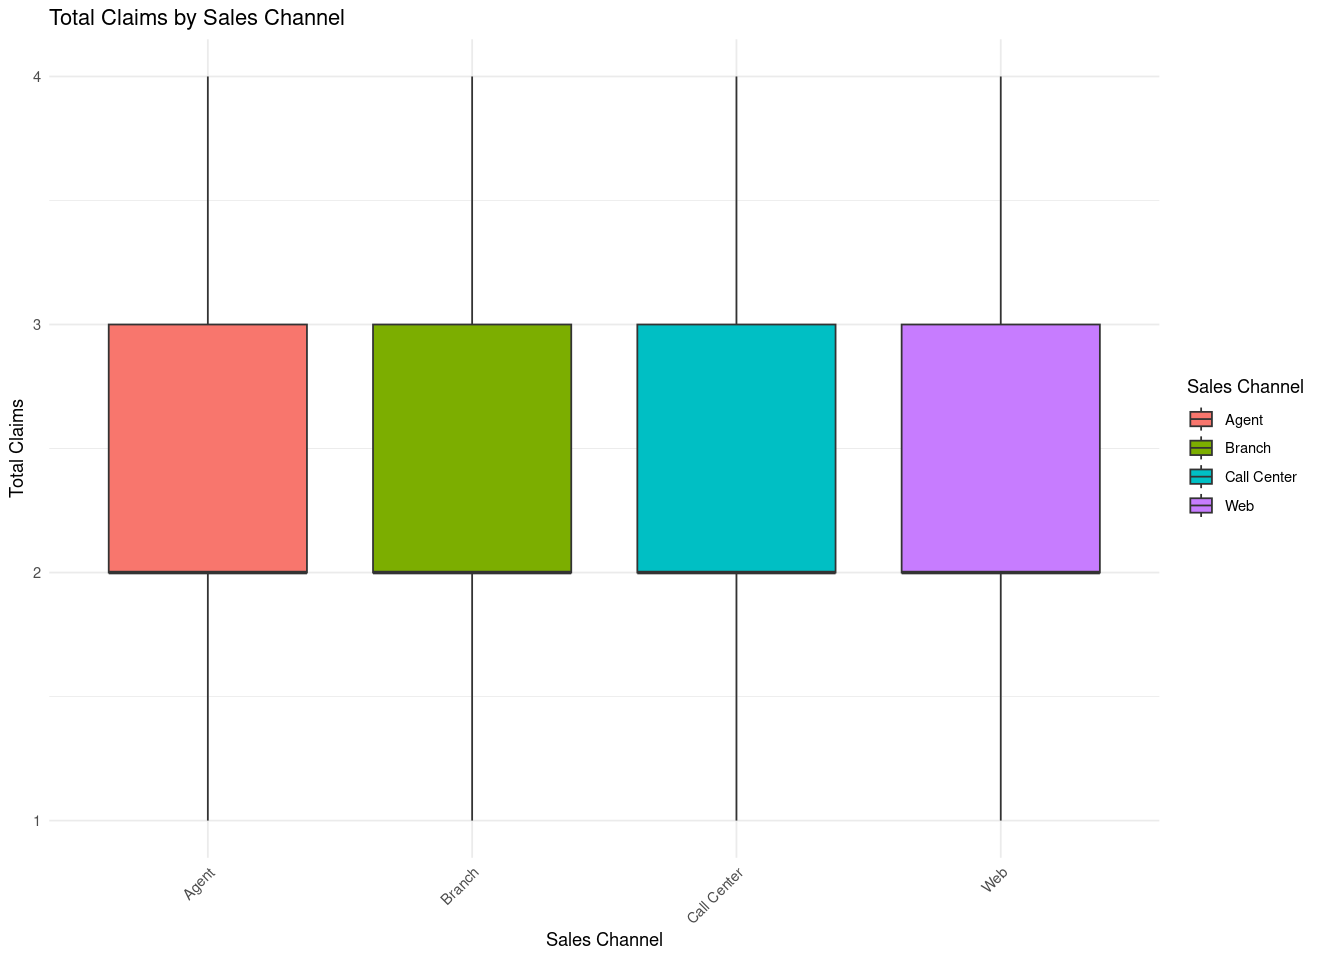

In [9]:
# load the required library functions
library(ggplot2)
library(dplyr)

# Visualization - Boxplot

# Box plot for total claims by sales channel
ggplot(claims_df, aes(x = sales_channel, y = total_claims, fill = sales_channel)) +
  geom_boxplot(outlier.color = "red", outlier.shape = 16, outlier.size = 2) + 
  theme_minimal() +
  labs(title = "Total Claims by Sales Channel",
       x = "Sales Channel",
       y = "Total Claims",
       fill = "Sales Channel") +
  theme(axis.text.x = element_text(angle = 45, hjust = 1))  

## Question 8


**Question**: Are there geographic trends in claims and Customer Lifetime Value (CLV) across different states, and how do they compare?



**Answer**: The bar chart visualization shows that California has the highest average claims (2775), followed closely by Washington (2761) and Nevada (2754). However, Nevada leads in CLV (971), while California and Washington have lower CLVs, indicating that high-claim states do not necessarily generate high lifetime value. The state summary table further highlights variations, with Oregon and Arizona also having high claims but relatively better CLVs. This suggests that certain states may have riskier customer profiles or different insurance policies driving claims. Insurers should implement location-based pricing strategies and assess regional risk factors to optimize profitability.


## Supporting Analysis


# A tibble: 5 × 4
  customer_state avg_claims avg_clv num_customers
  <fct>               <dbl>   <dbl>         <int>
1 California          2775.    883.          2150
2 Washington          2761.    867.           554
3 Nevada              2754.    971.           601
4 Oregon              2725.    947.          1763
5 Arizona             2708.    956.          1181


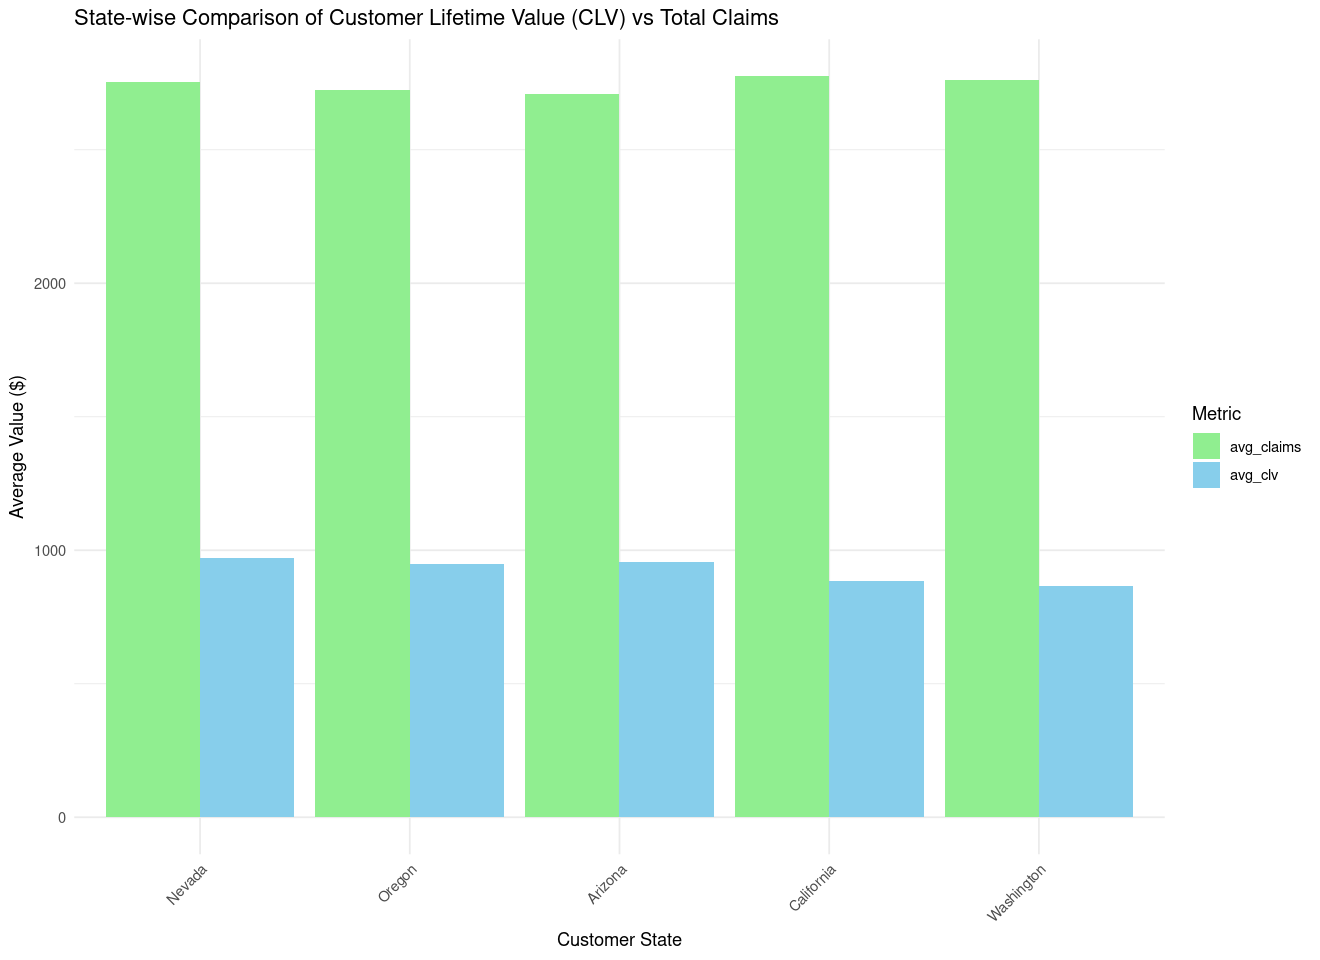

In [10]:
# Summary data frame

# Summary table: Average claims and customer lifetime value (CLV) by state
state_summary <- claims_df %>%
  group_by(customer_state) %>%
  summarise(avg_claims = mean(total_claims_amount),
            avg_clv = mean(customer_lifetime_value),
            num_customers = n()) %>%
  arrange(desc(avg_claims))

# Print the summary table
print(state_summary)

# load the required library functions
library(ggplot2)
library(dplyr)

state_summary <- claims_df %>%
  group_by(customer_state) %>%
  summarise(avg_claims = mean(total_claims_amount),
            avg_clv = mean(customer_lifetime_value)) %>%
  arrange(desc(avg_claims))  

state_summary_long <- state_summary %>%
  tidyr::pivot_longer(cols = c(avg_claims, avg_clv), names_to = "Metric", values_to = "Value")

# Visualization - Bar chart

# Bar chart for customer lifetime value (CLV) vs Total Claims per state
ggplot(state_summary_long, aes(x = reorder(customer_state, -Value), y = Value, fill = Metric)) +
  geom_bar(stat = "identity", position = "dodge") +  
  scale_fill_manual(values = c("avg_claims" = "light green", "avg_clv" = "skyblue")) +  
  theme_minimal() +
  labs(title = "State-wise Comparison of Customer Lifetime Value (CLV) vs Total Claims",
       x = "Customer State",
       y = "Average Value ($)",
       fill = "Metric") +
  theme(axis.text.x = element_text(angle = 45, hjust = 1))  

# Executive Summary (20 Points)

Write an executive summary of your overall findings and recommendations to the executives at this company. Think of this section as your closing remarks of a presentation, where you summarize your key findings and make recommendations to improve pricing, company operations, and car insurance policy adjustments.

Your executive summary must be written in a [professional tone](https://www.universalclass.com/articles/writing/business-writing/appropriate-tone-in-business-communications.htm), with minimal grammatical errors, and should include the following sections:

1.  An introduction where you explain the business problem and goals of your data analysis

- What problem(s) is this company trying to solve? Why are they important to their future success?
- What was the goal of your analysis? What questions were you trying to answer and why do they matter?

<br>

2.  Highlights and key findings from your Exploratory Data Analysis section

- What were the interesting findings from your analysis and **why are they important for the business**?
	- Note: **Do not list all your questions and answers from the exploratory analysis section**. You should summarize the findings and list them in order by their potential business impact 
- This section is meant to **establish the need for your recommendations** in the following section

<br>

3.  Your recommendations to the company

- Each recommendation must be supported by your data analysis results
- You must clearly explain **why** you are making each recommendation and which results from your data analysis support this recommendation
- You must also describe the potential business impact of your recommendation:
	- Why is this a good recommendation?
	- What benefits will the business achieve?

**Please add you executive summary in the text block below**.

## Introduction

The automobile insurance company wants to improve pricing, increase profits and reduce the financial risks related to customer claims and insurance policies. One of the biggest challenges is figuring out which customers, policy types and locations lead to high claim costs while also making sure that valuable customers stay loyal and engaged. It is important to identify customers who cost the company more than they contribute so that pricing, customer relationships and risk management can be adjusted accordingly.

This analysis focused on understanding what drives profitability and financial risk by looking at customer data, policy details, location trends and claim history.

By answering to the above eight questions, the company can fine tune the pricing, improve customer targeting and adjust the policies to reduce risk, ensuring long term success and financial stability. 


## Key Findings

The exploratory data analysis uncovered several crucial insights that can help the company improve pricing, reduce financial risk and retain valuable customers.

1. Corporate Policies Bring in the Most Value:
 Corporate insurance policies have the highest CLV, followed by personal policies. However, specialty policies have significantly lower CLV which may mean they are underpriced or attracting high risk customers. The company could adjust pricing or eligibility criteria to improve profits.

2. New Customers File More Claims:
 Customers who have been with the company for a shorter time tend to file more claims, especially in their first few months. This suggests they might be testing coverage limits or belong to a higher risk group. The company could introduce better screening for new customers or offer discounts for long term commitments.

3. Sales Channel Doesn’t Affect Claim Frequency Much:
 There is no major difference in claim frequency across sales channels such as agents, branches, call centers and web. This means how a customer signs up does not strongly impact their likelihood of filing claims. However, further segmentation may reveal hidden risk patterns within these groups.

4. Location Matters - Some States Have Higher Claims:
 Certain states, like California and Washington have more claims while Nevada and Arizona have better balance between claims and CLV. This means that some areas are riskier and the company could adjust pricing based on location to stay profitable.

5. Higher Premiums Often Mean Higher CLV But Not Always:
 Customers who pay higher monthly premiums tend to have a higher CLV but there are exceptions where high premium customers still file a lot of claims. This shows that pricing alone isn’t enough to predict risk and other factors should be considered when setting rates.

## Recommendations

After analyzing the company’s data, it is clear that some areas need improvement to increase profitability, reduce risks and enhance customer retention. 

One of the biggest concerns is high risk customers who file excessive claims, costing the company more than they contribute. To address this the company should introduce risk based pricing where customers with frequent claims pay higher premiums while responsible customers receive discounts. This approach will balance revenue and claim costs while promoting responsible customer behavior.

Another important finding is that corporate policies generate the most revenue while specialty policies underperform possibly because they attract riskier customers. The company should review and adjust pricing for these low CLV policies to ensure they are not underpriced. By optimizing policy pricing the company can focus on high value customers and eliminate unprofitable policy structures leading to better financial stability.

The data also shows that new customers tend to file more claims especially within their first few months. This suggests that some may be testing their coverage limits or belong to a higher risk group. 

Geographic location plays a big role in claim frequency and profitability. States like California and Washington have higher claim rates while Nevada and Arizona have a better balance between CLV and claims. To account for these differences the company should introduce location-based pricing adjustments increasing premiums in high risk states while offering discounts in more profitable regions. This will ensure that regional risk factors are factored into pricing strategies.

Finally, fraud detection should be strengthened. Some customers file excessive claims within a short period which could indicate fraud or policy abuse. The company should invest in fraud detection tools and claim monitoring systems to flag suspicious activity early. By identifying fraudulent behavior and optimizing pricing strategies the company can reduce financial losses and improve profitability and build a more sustainable business model.